In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## DATA ANALYSIS

###### heart.csv

In [32]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

##### The data has no missing or unknown values

In [35]:
corr_data = data.copy()
correlation_matrix = corr_data.corr()

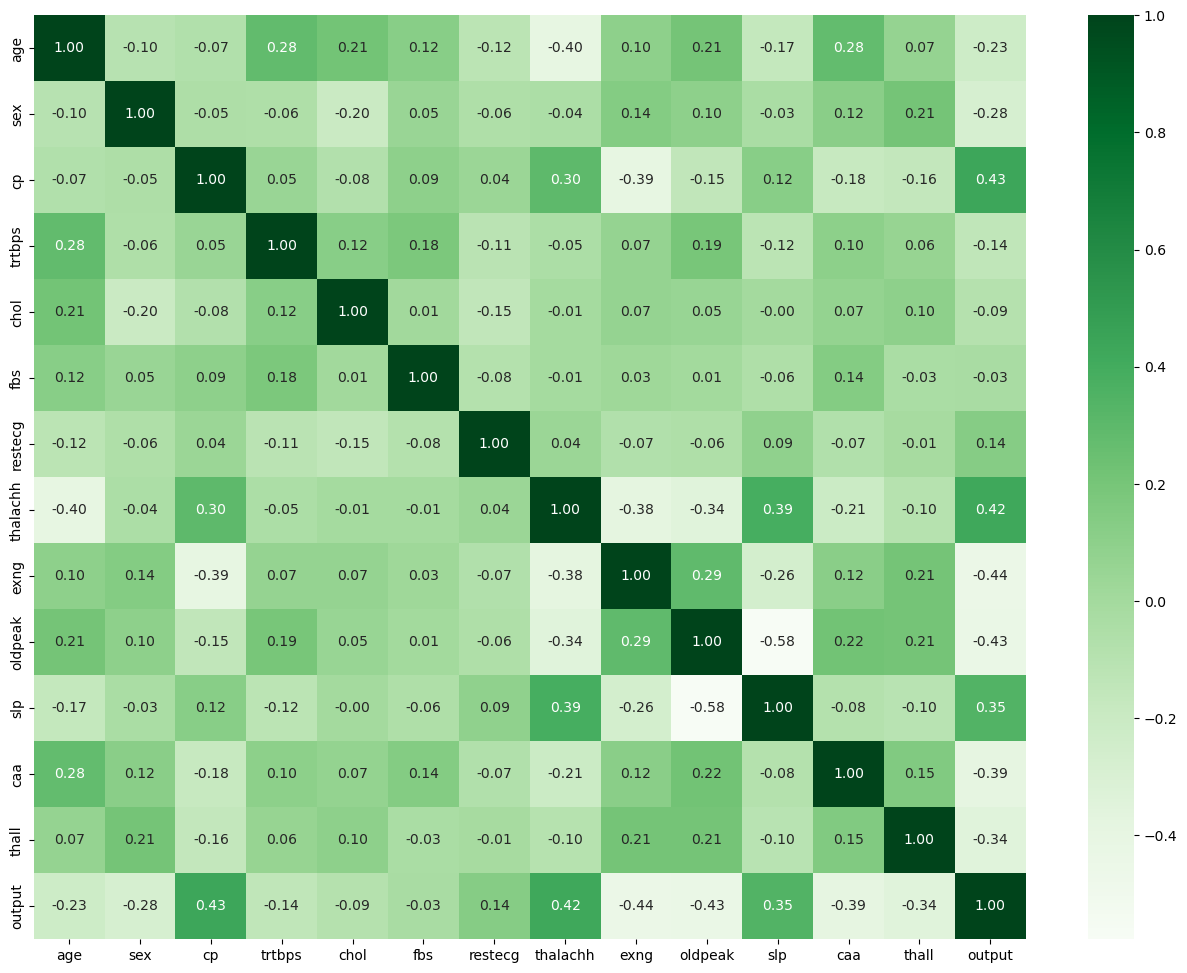

In [38]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="Greens")
plt.show()

#### there are no significant correlations in the dataset

### Verifying the distribution of the data

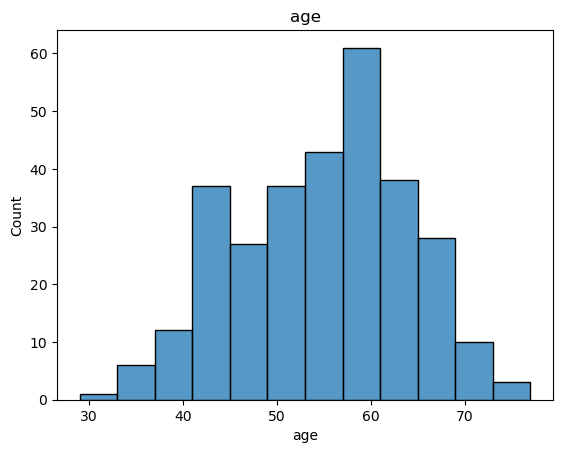

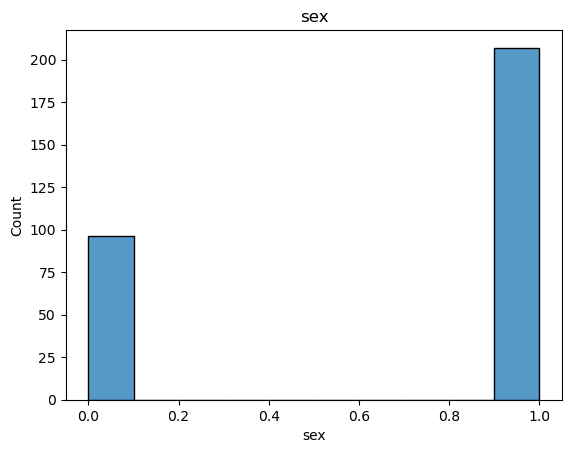

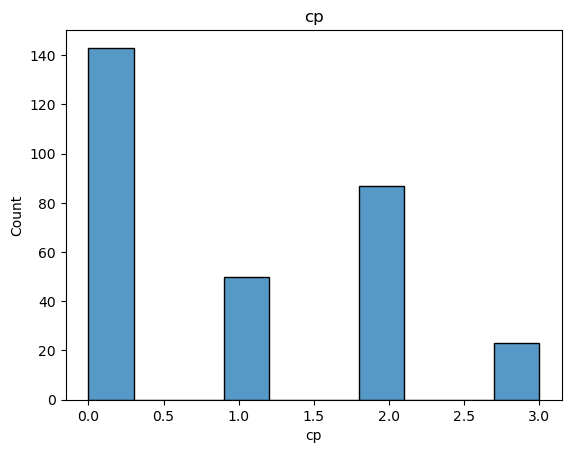

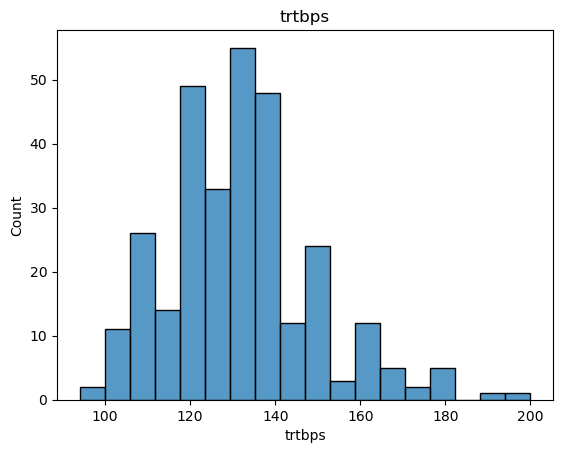

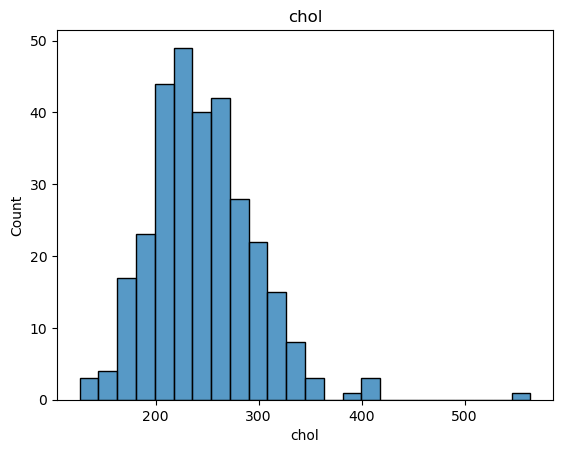

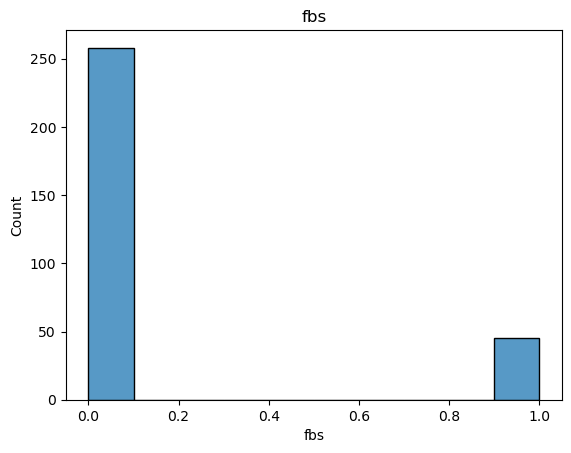

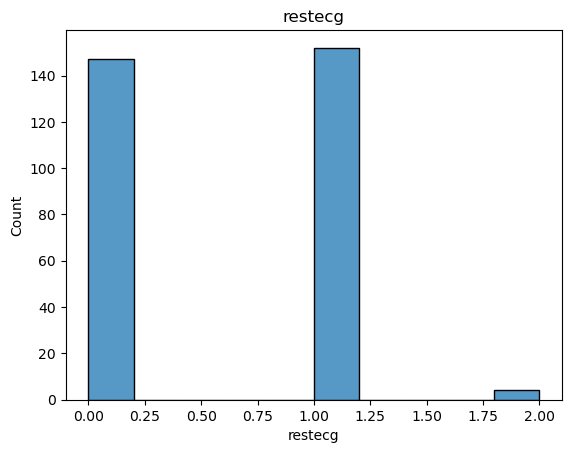

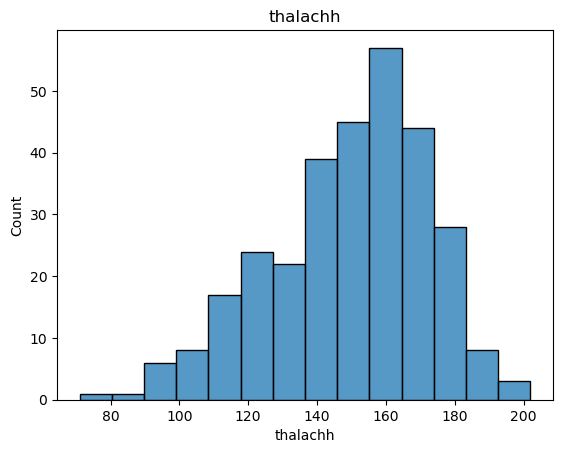

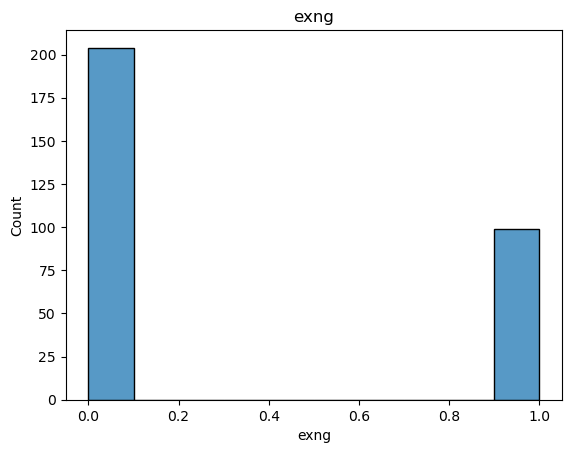

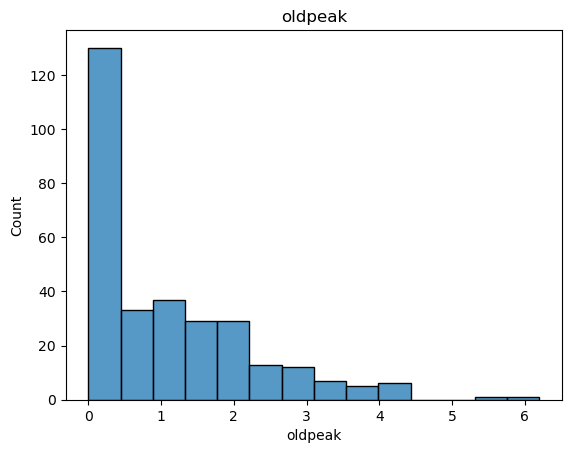

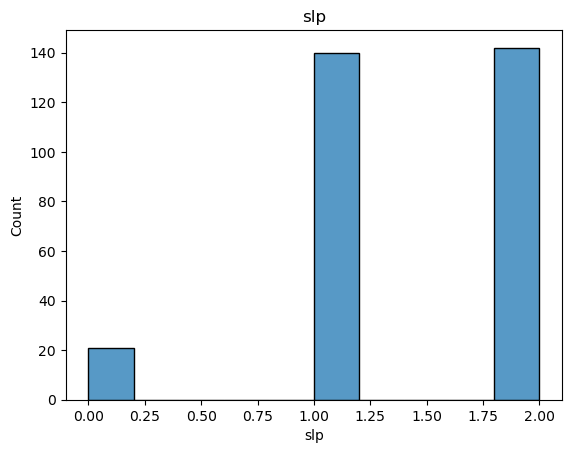

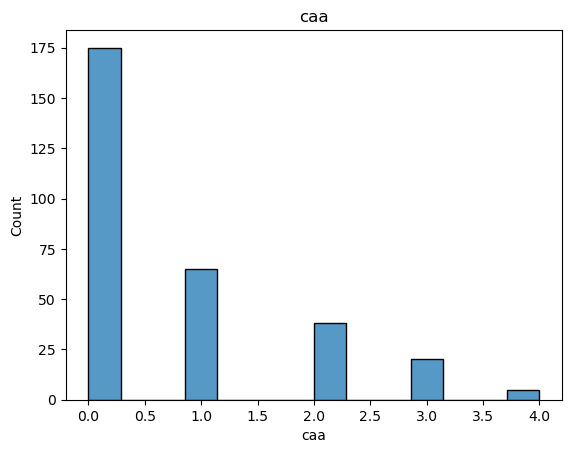

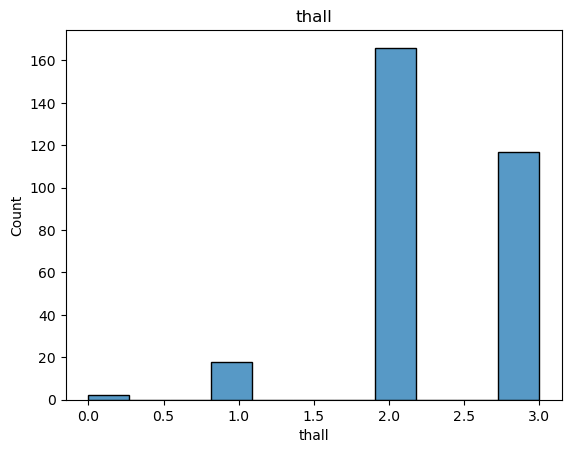

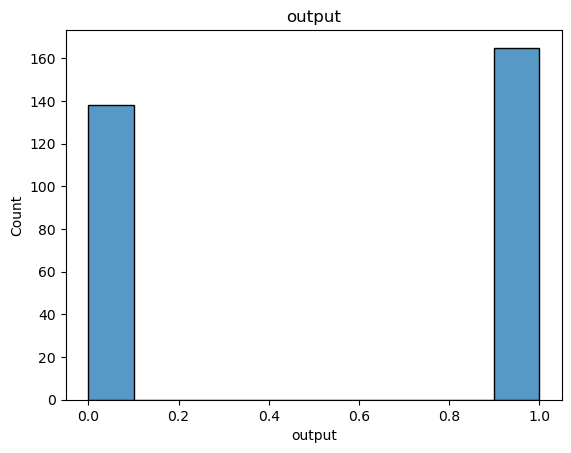

In [37]:
for col in data.columns:

    sns.histplot(data[col])
    plt.title(f'{col}')
    plt.show()

#### There are continuous and categorical variables in the dataset. The data are reasonably balanced.

### Checking potential outliers for numerical values

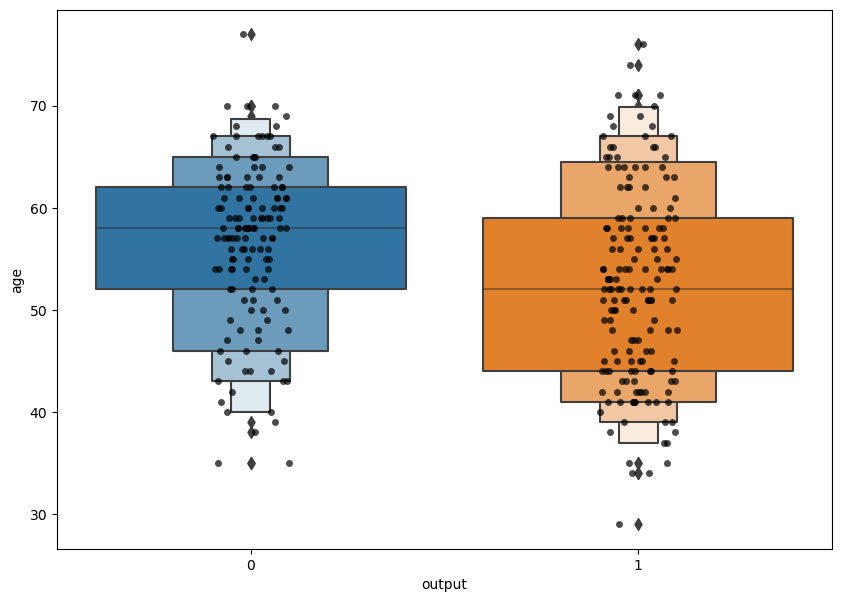

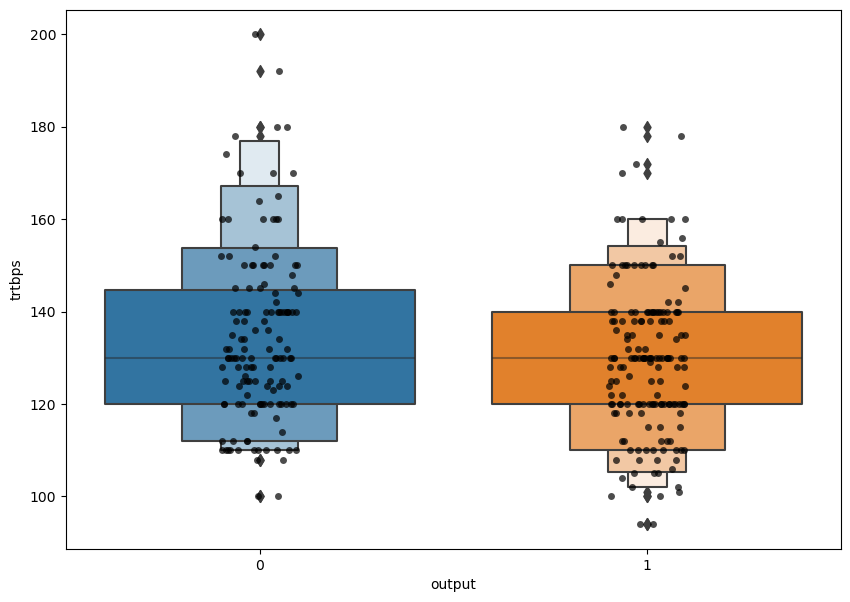

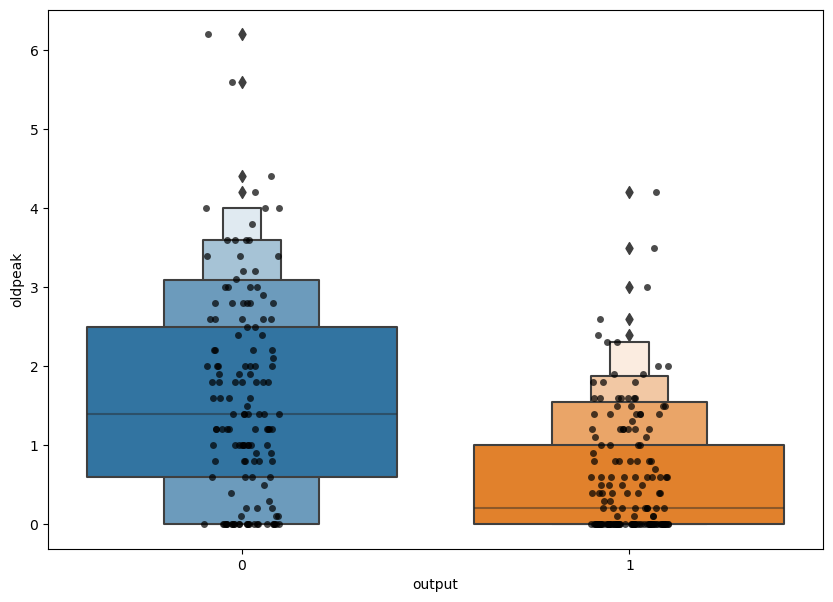

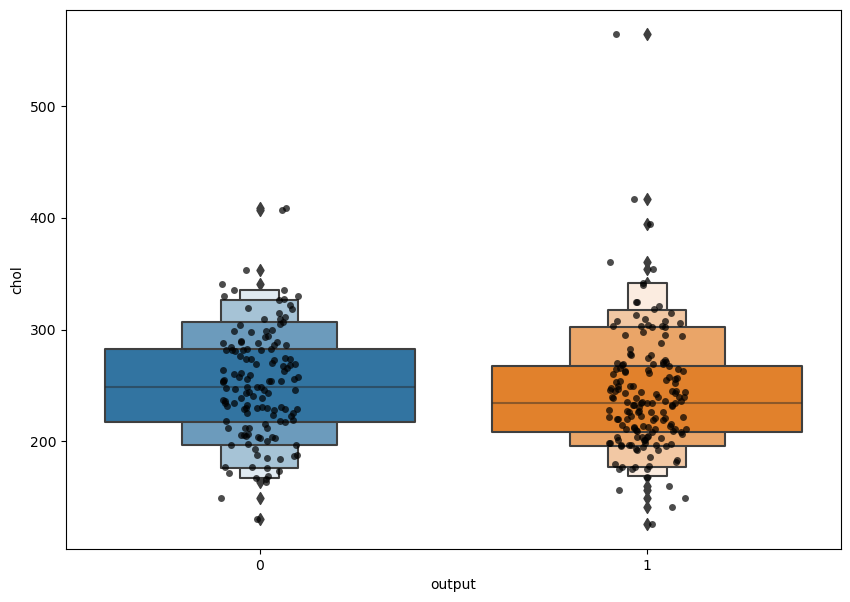

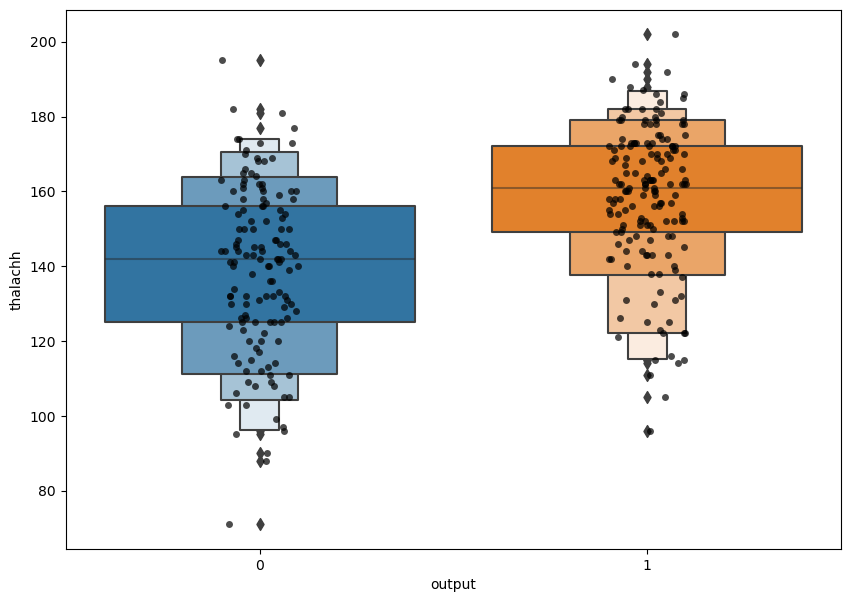

In [46]:
feature = ['age', 'trtbps', 'oldpeak', 'chol', 'thalachh']
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.stripplot(x=data['output'], y=data[i], color="black", alpha=0.7)
    sns.boxenplot(x=data['output'], y=data[i])
    plt.show() 

#### There are outliers that do not appear to be significant

## DATA PREPROCESSING